In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir ="C:\Users\server4/Desktop/train"
test_dir = "C:\Users/server4/Desktop/test"


# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten image data for SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train an SVM model
print("Training SVM model...")
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train_scaled, y_train_encoded)

# Make predictions
print("Evaluating model...")
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Calculate probabilities for ROC AUC
y_test_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training SVM model...
Evaluating model...
Training Accuracy: 1.00
Testing Accuracy: 0.99
Classification Report:


TypeError: object of type 'numpy.float32' has no len()

Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.


C:\Users\server4\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8316 - loss: 0.4091 - val_accuracy: 0.9945 - val_loss: 0.0147
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.9965 - val_loss: 0.0078
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9975 - val_loss: 0.0077
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9970 - val_loss: 0.0062
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9981 - loss: 0.0050 - val_accuracy: 0.9905 - val_loss: 0.0272
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9986 - loss: 0.0039 - val_accuracy: 0.9935 - val_loss: 0.0144
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9969 - loss: 0.0116 - val_accuracy: 0.9970 - val_loss: 0.0080
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9987 - loss: 0.0029 - val_accu

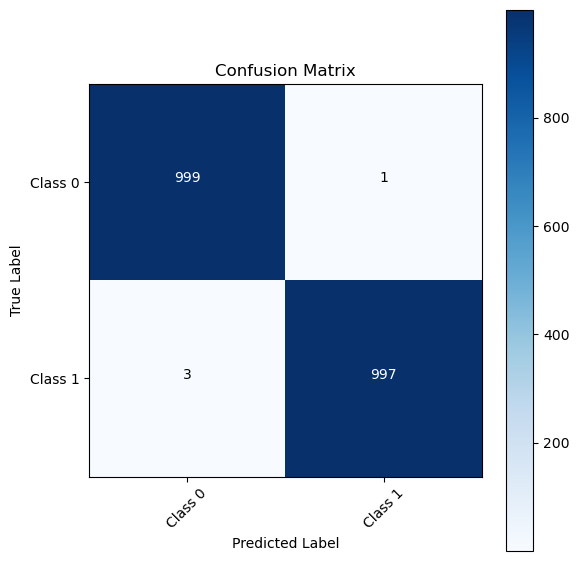

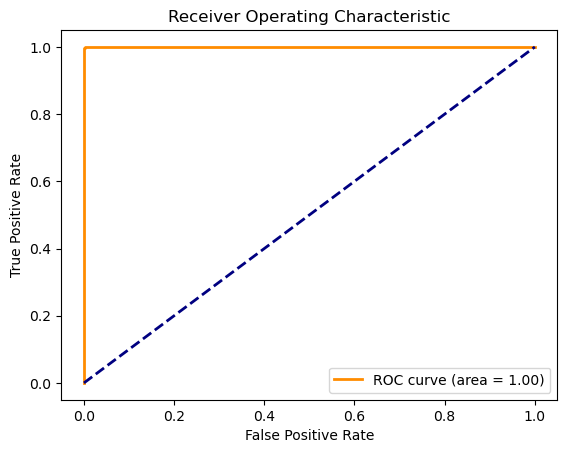

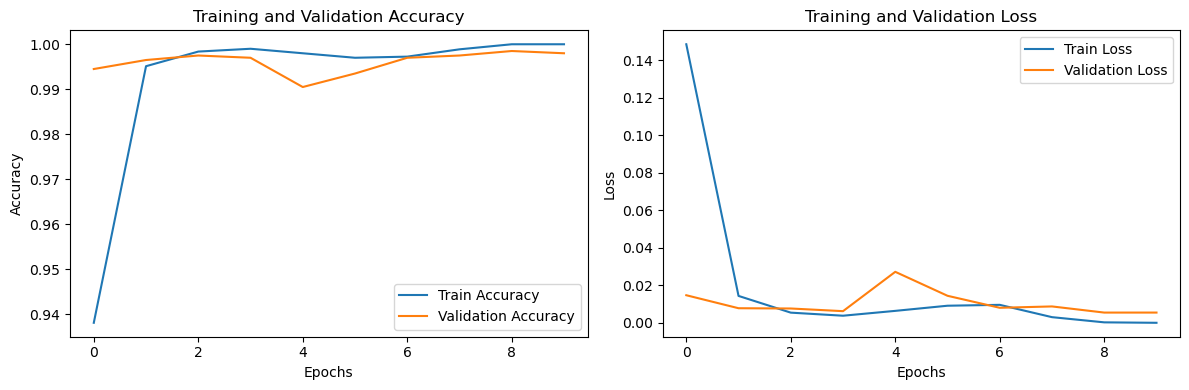

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

# Paths to the dataset
train_dir ="C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the images (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Build a simple CNN model (for example, a 2-layer CNN with pooling)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test))

# Metrics
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Convert predictions to binary values
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Classification report
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print("Classification Report:")
print(classification_report(y_test, y_test_pred_binary, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.


C:\Users\server4\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8216 - loss: 0.6099 - val_accuracy: 0.9795 - val_loss: 0.0609
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9609 - loss: 0.1093 - val_accuracy: 0.8470 - val_loss: 0.3754
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9586 - loss: 0.1106 - val_accuracy: 0.9215 - val_loss: 0.2132
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9406 - loss: 0.1751 - val_accuracy: 0.9845 - val_loss: 0.0446
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9841 - loss: 0.0441 - val_accuracy: 0.9830 - val_loss: 0.0415
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9888 - loss: 0.0257 - val_accuracy: 0.9845 - val_loss: 0.0417
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9860 - loss: 0.0358 - val_accuracy: 0.9810 - val_loss: 0.0594
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9818 - loss: 0.0473 - val_accuracy: 0

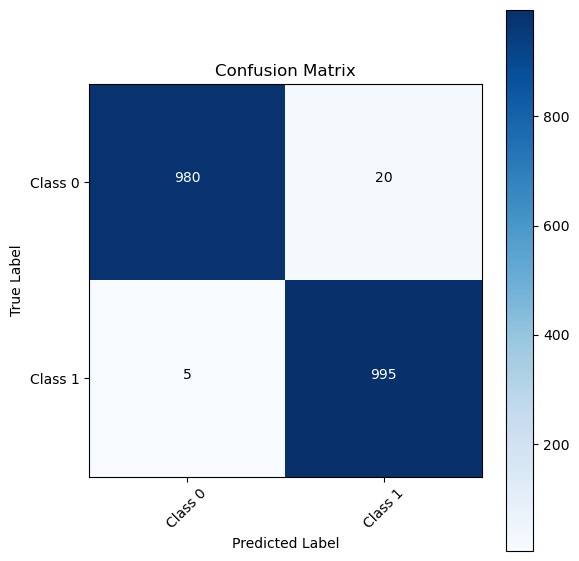

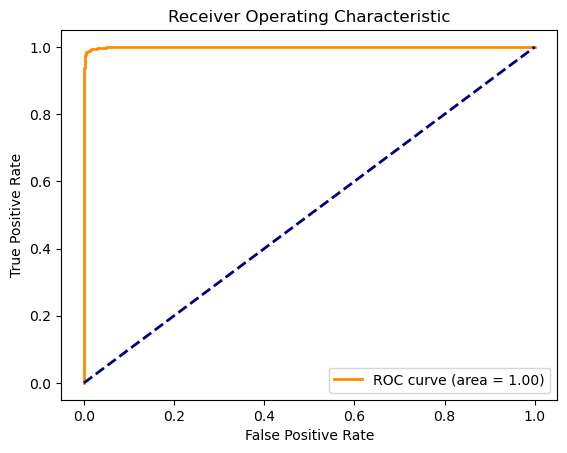

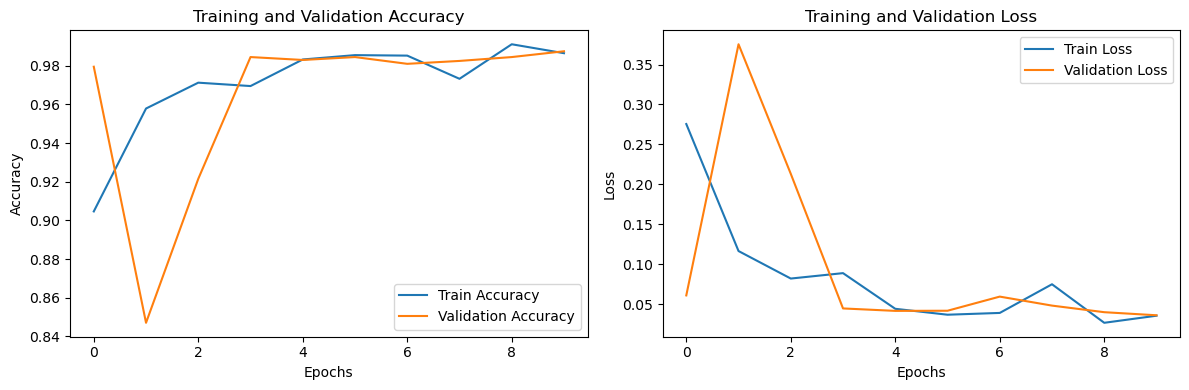

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the images (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Flatten the images to a vector for DNN
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

# Build a simple DNN model (fully connected layers)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_flat.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs
history = model.fit(X_train_flat, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_flat, y_test))

# Metrics
y_train_pred = model.predict(X_train_flat)
y_test_pred = model.predict(X_test_flat)

# Convert predictions to binary values
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Classification report
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print("Classification Report:")
print(classification_report(y_test, y_test_pred_binary, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training Random Forest model...
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99      1000
     Class 1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[994   6]
 [ 14 986]]


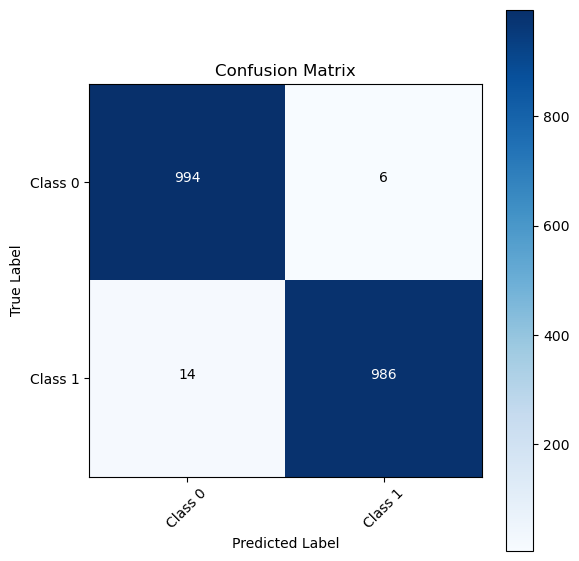

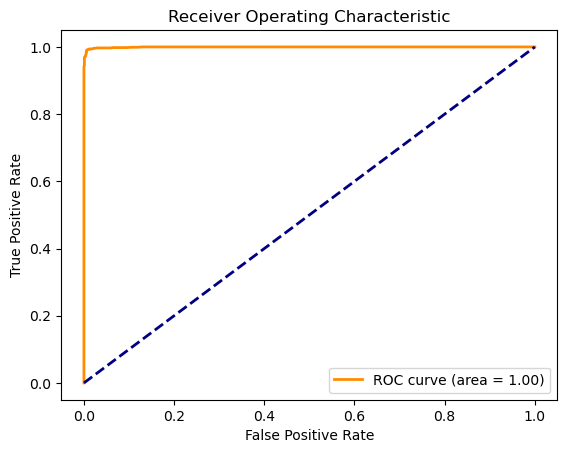

Training Accuracy: 1.00
Testing Accuracy: 0.99


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the images (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Flatten the images to a vector for Random Forest
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
print("Training Random Forest model...")
rf_model.fit(X_train_flat, y_train)

# Metrics
y_train_pred = rf_model.predict(X_train_flat)
y_test_pred = rf_model.predict(X_test_flat)

# Classification report
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_flat)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")



ModuleNotFoundError: No module named 'xgboost'

In [15]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 453.5 kB/s eta 0:04:35
   ---------------------------------------- 0.5/124.9 MB 453.5 kB/s eta 0:04:35
   ---------------------------------------- 0.5/124.9 MB 453.5 kB/s eta 0:04:35
   ---------------------------------------- 0.8/124.9 MB 424.5 kB/s eta 0:04:53
   ---------------------------------------- 0.8/124.9 MB 424.5 kB/s eta 0:04:53
   ---------------------------------------- 0.8/124.9 MB 424.5 kB/s eta 0:04:53
   ------------------

Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training XGBoost model...
Evaluating model...
Training Accuracy: 1.00
Testing Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99      1000
     Class 1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[995   5]
 [ 11 989]]


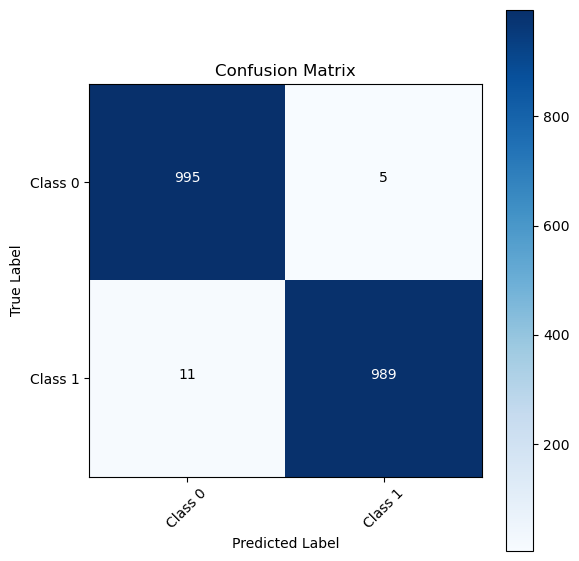

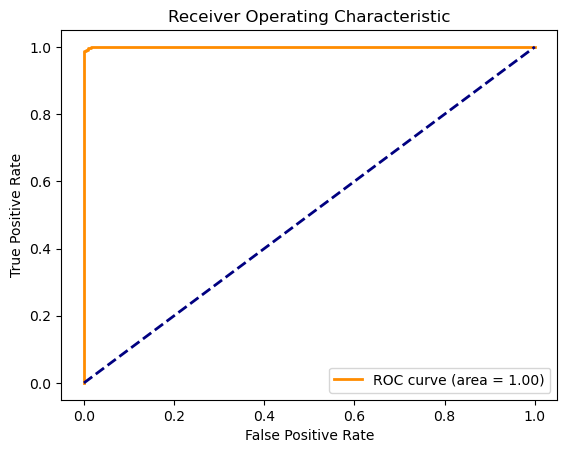

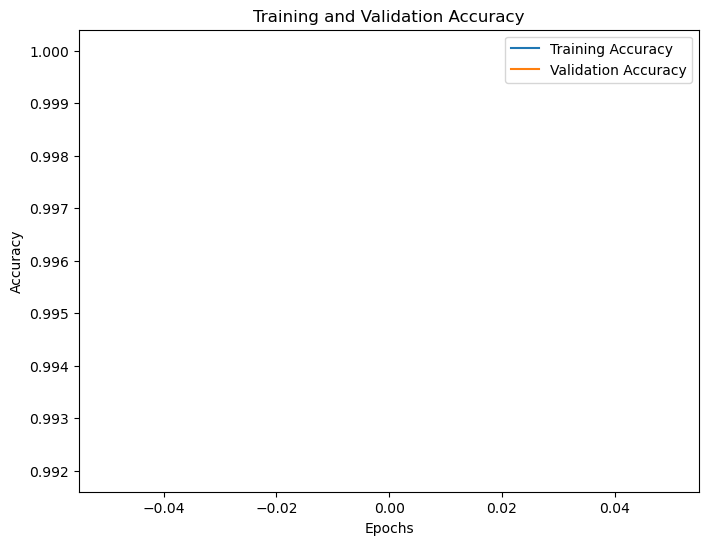

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for the XGBoost model (required for tabular data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the data (scaling pixel values between 0 and 1)
X_train_scaled = X_train_flat / 255.0
X_test_scaled = X_test_flat / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train an XGBoost model
print("Training XGBoost model...")
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train_encoded)

# Make predictions
print("Evaluating model...")
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Calculate probabilities for ROC AUC
y_test_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print(classification_report(y_test_encoded, y_test_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss (For XGBoost, this is not directly applicable, but we can plot training accuracy)

# Plot training accuracy
plt.figure(figsize=(8, 6))
plt.plot(xgb_model.score(X_train_scaled, y_train_encoded), label='Training Accuracy')
plt.plot(xgb_model.score(X_test_scaled, y_test_encoded), label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training Logistic Regression model...
Evaluating model...
Training Accuracy: 1.00
Testing Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99      1000
     Class 1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[993   7]
 [  7 993]]


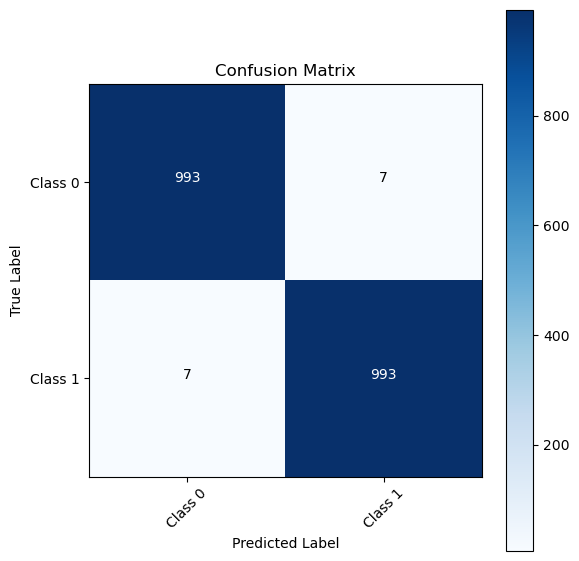

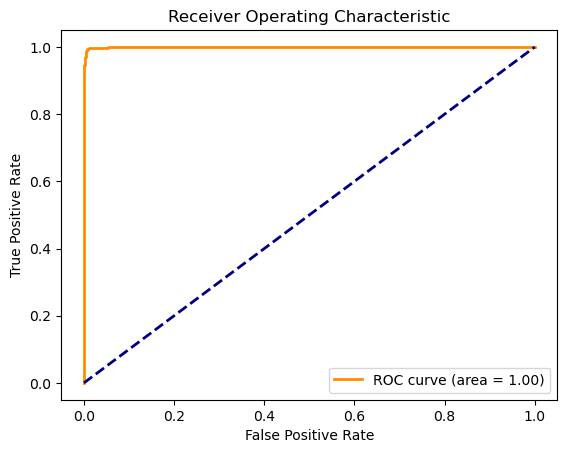

In [3]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for Logistic Regression model (required for tabular data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the data (scaling pixel values between 0 and 1)
X_train_scaled = X_train_flat / 255.0
X_test_scaled = X_test_flat / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train a Logistic Regression model
print("Training Logistic Regression model...")
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_train_encoded)

# Make predictions
print("Evaluating model...")
y_train_pred = logreg_model.predict(X_train_scaled)
y_test_pred = logreg_model.predict(X_test_scaled)

# Calculate probabilities for ROC AUC
y_test_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print(classification_report(y_test_encoded, y_test_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss (For Logistic Regression, this is not directly applicable, but we can track training accuracy)
                                                                                                                                                        

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for Decision Tree model (required for tabular data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
print("Training Decision Tree model...")
model.fit(X_train_scaled, y_train_encoded)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=label_encoder.classes_)
plt.show()

# Plot accuracy graph (since decision trees don't have loss per epoch, we'll show accuracy over train/test)
plt.figure(figsize=(8, 6))
plt.plot([1], [train_accuracy], label="Train Accuracy", marker='o', color='blue')
plt.plot([1], [test_accuracy], label="Test Accuracy", marker='o', color='orange')
plt.title("Train vs Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Since Decision Trees don't have loss during training like neural networks, we skip the loss graph
# However, you could track metrics over different configurations of the model (e.g., hyperparameters) if desired.


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training Decision Tree model...
Training Accuracy: 1.00
Testing Accuracy: 0.96
Classification Report:


TypeError: object of type 'numpy.float32' has no len()

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for KNN model (required for tabular data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Get the original class labels (before encoding) for classification report
class_names = label_encoder.classes_

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors to your preference

# Train the KNN model
print("Training KNN model...")
knn.fit(X_train_scaled, y_train_encoded)

# Make predictions
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot accuracy graph (since KNN doesn't have loss per epoch, we'll show accuracy over train/test)
plt.figure(figsize=(8, 6))
plt.plot([1], [train_accuracy], label="Train Accuracy", marker='o', color='blue')
plt.plot([1], [test_accuracy], label="Test Accuracy", marker='o', color='orange')
plt.title("Train vs Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training KNN model...
Training Accuracy: 0.94
Testing Accuracy: 0.91
Classification Report:


TypeError: object of type 'numpy.float32' has no len()

Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training KNN model...
Training Accuracy: 0.94
Testing Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      1000
         1.0       0.92      0.89      0.90      1000

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Confusion Matrix:
[[919  81]
 [107 893]]


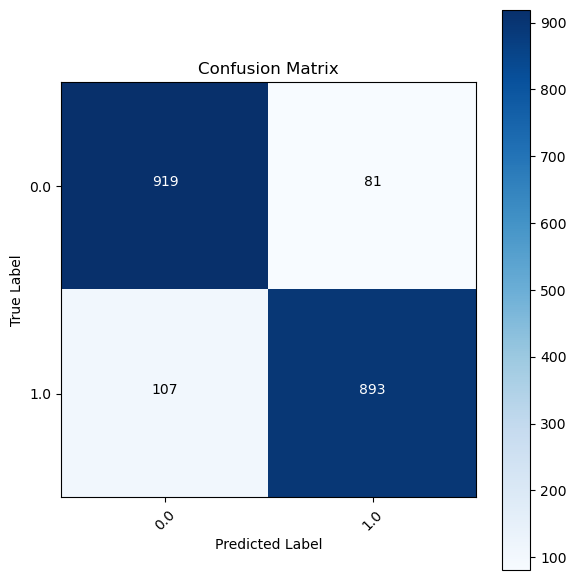

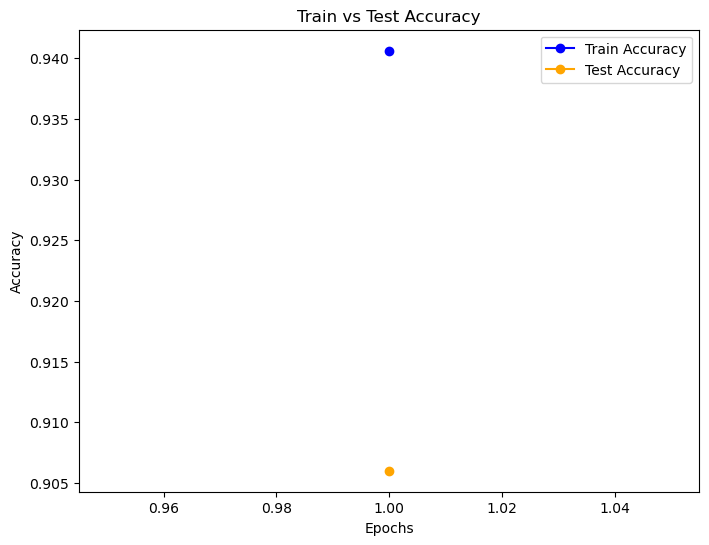

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for KNN model (required for tabular data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Get the original class labels (before encoding) for classification report
class_names = label_encoder.classes_

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors to your preference

# Train the KNN model
print("Training KNN model...")
knn.fit(X_train_scaled, y_train_encoded)

# Make predictions (ensure binary classification)
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=[str(i) for i in class_names]))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=[str(i) for i in class_names])
plt.show()

# Plot accuracy graph (since KNN doesn't have loss per epoch, we'll show accuracy over train/test)
plt.figure(figsize=(8, 6))
plt.plot([1], [train_accuracy], label="Train Accuracy", marker='o', color='blue')
plt.plot([1], [test_accuracy], label="Test Accuracy", marker='o', color='orange')
plt.title("Train vs Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training Naive Bayes model...
Training Accuracy: 0.84
Testing Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1000
         1.0       0.85      0.81      0.83      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix:
[[862 138]
 [189 811]]


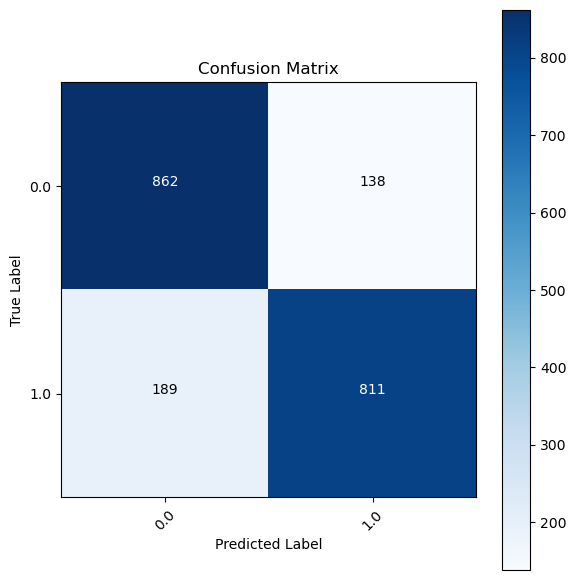

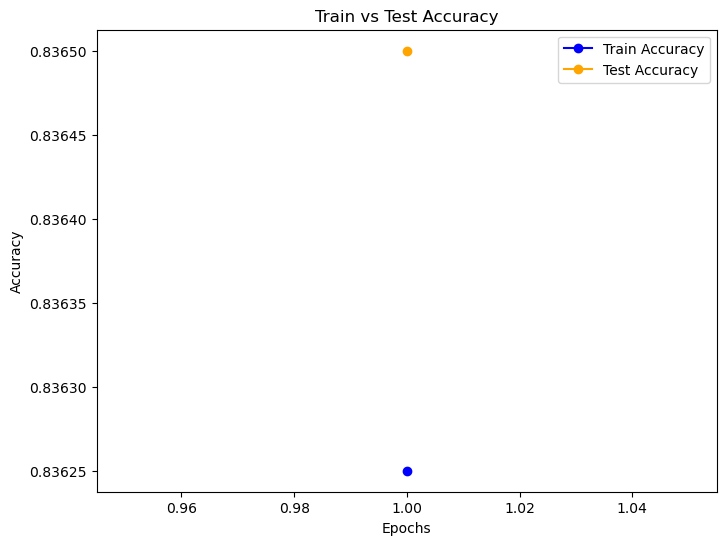

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for Naive Bayes model (required for tabular data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Get the original class labels (before encoding) for classification report
class_names = label_encoder.classes_

# Initialize the Naive Bayes model
nb = GaussianNB()

# Train the Naive Bayes model
print("Training Naive Bayes model...")
nb.fit(X_train_scaled, y_train_encoded)

# Make predictions (ensure binary classification)
y_train_pred = nb.predict(X_train_scaled)
y_test_pred = nb.predict(X_test_scaled)

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=[str(i) for i in class_names]))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=[str(i) for i in class_names])
plt.show()

# Plot accuracy graph (since Naive Bayes doesn't have loss per epoch, we'll show accuracy over train/test)
plt.figure(figsize=(8, 6))
plt.plot([1], [train_accuracy], label="Train Accuracy", marker='o', color='blue')
plt.plot([1], [test_accuracy], label="Test Accuracy", marker='o', color='orange')
plt.title("Train vs Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [13]:


import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for AdaBoost model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the AdaBoost model with a Decision Tree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Stump model
ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)

# Train the AdaBoost model
print("Training AdaBoost model...")
ada_model.fit(X_train_scaled, y_train_encoded)

# Make predictions
y_train_pred = ada_model.predict(X_train_scaled)
y_test_pred = ada_model.predict(X_test_scaled)

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=[str(i) for i in label_encoder.classes_]))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=[str(i) for i in label_encoder.classes_])
plt.show()

# Plot accuracy graph
plt.figure(figsize=(8, 6))
plt.plot([1], [train_accuracy], label="Train Accuracy", marker='o', color='blue')
plt.plot([1], [test_accuracy], label="Test Accuracy", marker='o', color='orange')
plt.title("Train vs Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.


TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for AdaBoost model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the AdaBoost model with a Decision Tree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Stump model
ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)

# Train the AdaBoost model
print("Training AdaBoost model...")
ada_model.fit(X_train_scaled, y_train_encoded)

# Make predictions
y_train_pred = ada_model.predict(X_train_scaled)
y_test_pred = ada_model.predict(X_test_scaled)

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=[str(i) for i in label_encoder.classes_]))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=[str(i) for i in label_encoder.classes_])
plt.show()

# Plot accuracy graph
plt.figure(figsize=(8, 6))
plt.plot([1], [train_accuracy], label="Train Accuracy", marker='o', color='blue')
plt.plot([1], [test_accuracy], label="Test Accuracy", marker='o', color='orange')
plt.title("Train vs Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.


TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training AdaBoost model...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 1.00
Testing Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1000
         1.0       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[990  10]
 [ 14 986]]


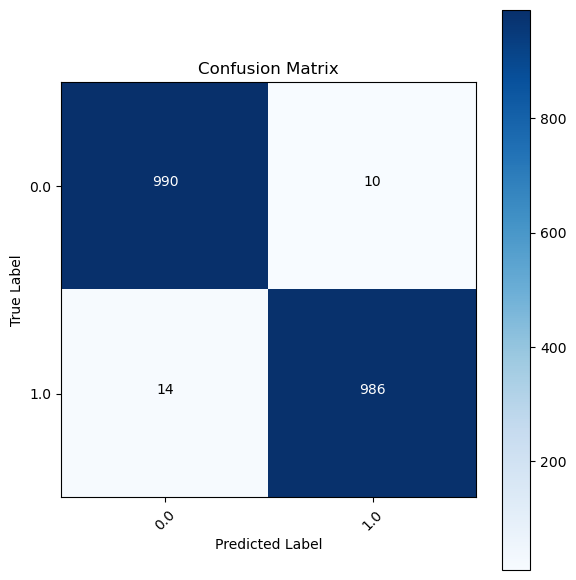

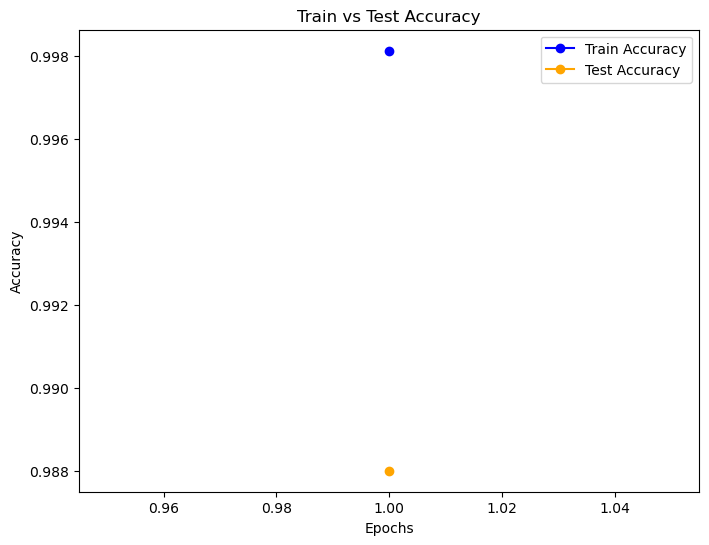

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for AdaBoost model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the AdaBoost model (uses DecisionTreeClassifier by default as base estimator)
ada_model = AdaBoostClassifier(n_estimators=50)

# Train the AdaBoost model
print("Training AdaBoost model...")
ada_model.fit(X_train_scaled, y_train_encoded)

# Make predictions
y_train_pred = ada_model.predict(X_train_scaled)
y_test_pred = ada_model.predict(X_test_scaled)

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=[str(i) for i in label_encoder.classes_]))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=[str(i) for i in label_encoder.classes_])
plt.show()

# Plot accuracy graph
plt.figure(figsize=(8, 6))
plt.plot([1], [train_accuracy], label="Train Accuracy", marker='o', color='blue')
plt.plot([1], [test_accuracy], label="Test Accuracy", marker='o', color='orange')
plt.title("Train vs Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training Gradient Boosting model...
Training Accuracy: 1.00
Testing Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1000
         1.0       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[991   9]
 [ 14 986]]


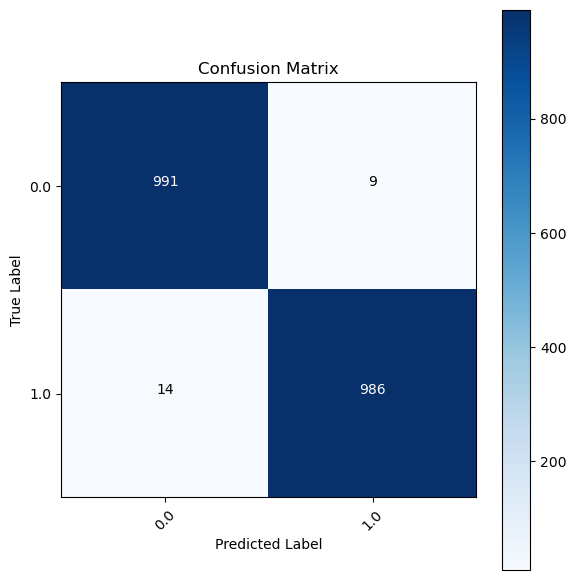

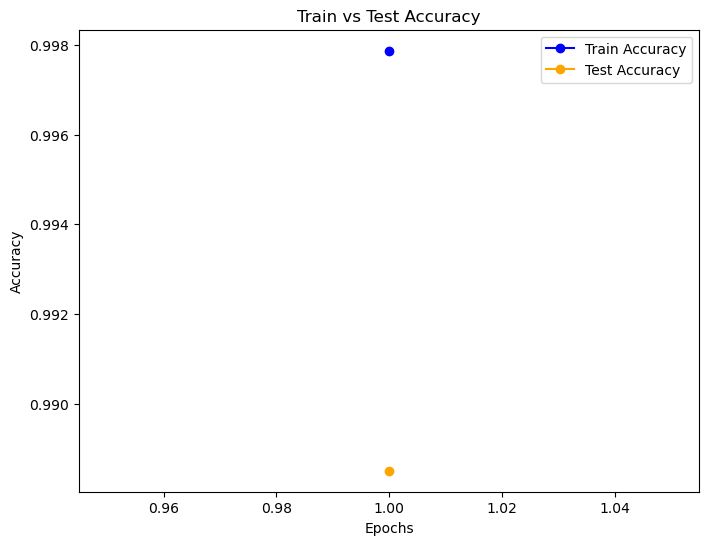

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 50  # Set number of boosting iterations (epochs)

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for GBM model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier(n_estimators=epochs, learning_rate=0.1, max_depth=3)

# Train the Gradient Boosting model
print("Training Gradient Boosting model...")
gbm_model.fit(X_train_scaled, y_train_encoded)

# Make predictions
y_train_pred = gbm_model.predict(X_train_scaled)
y_test_pred = gbm_model.predict(X_test_scaled)

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=[str(i) for i in label_encoder.classes_]))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=[str(i) for i in label_encoder.classes_])
plt.show()

# Plot accuracy graph
plt.figure(figsize=(8, 6))
plt.plot([1], [train_accuracy], label="Train Accuracy", marker='o', color='blue')
plt.plot([1], [test_accuracy], label="Test Accuracy", marker='o', color='orange')
plt.title("Train vs Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the images (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize base models
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=50)),
    ('svm', SVC(probability=True, kernel='linear'))
]

# Initialize the meta-classifier (final estimator)
meta_classifier = LogisticRegression()

# Create the Stacking Classifier model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_classifier)

# Train the Stacking Classifier model
print("Training Stacking Classifier model...")
stacking_model.fit(X_train_scaled.reshape(X_train_scaled.shape[0], -1), y_train_encoded)

# Make predictions
y_train_pred = stacking_model.predict(X_train_scaled.reshape(X_train_scaled.shape[0], -1))
y_test_pred = stacking_model.predict(X_test_scaled.reshape(X_test_scaled.shape[0], -1))

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=label_encoder.classes_)
plt.show()

# Plot ROC Curve
y_test_proba = stacking_model.predict_proba(X_test_scaled.reshape(X_test_scaled.shape[0], -1))[:, 1]
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss
# (Since this is not a neural network, there's no loss and accuracy per epoch available.
# We can plot accuracy over training/testing data)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Optional: You can add custom plots for the accuracy and other metrics over epochs for more detailed analysis.


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training Stacking Classifier model...
Classification Report:


TypeError: object of type 'numpy.float32' has no len()

Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training Ridge Regression model...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.37675e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


Training Lasso Regression model...
Ridge Regression Training Accuracy: 1.00
Ridge Regression Testing Accuracy: 0.97
Lasso Regression Training Accuracy: 0.50
Lasso Regression Testing Accuracy: 0.50
Ridge Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1000
         1.0       0.95      0.98      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Lasso Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      1000
         1.0       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000

Ridge Regression Confusion Matrix:
[[952  48]
 [ 18 982]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


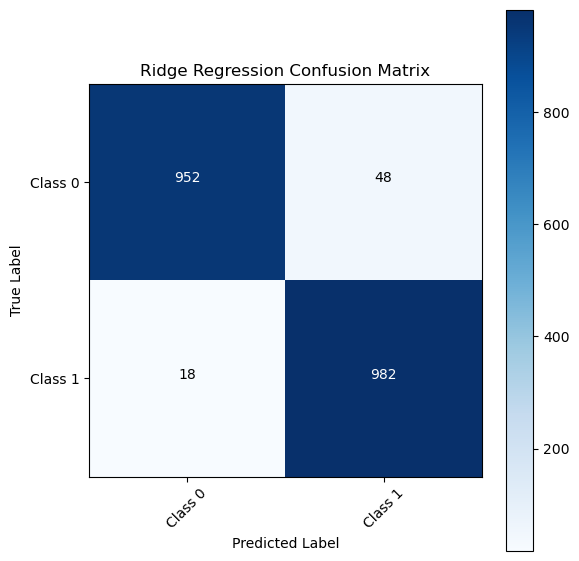

Lasso Regression Confusion Matrix:
[[1000    0]
 [1000    0]]


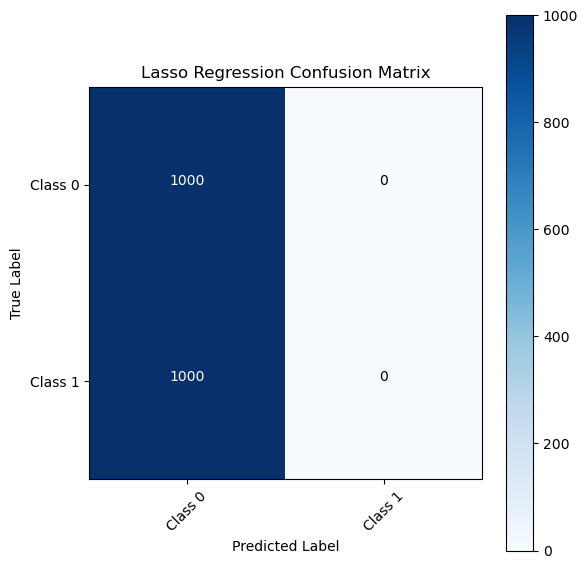

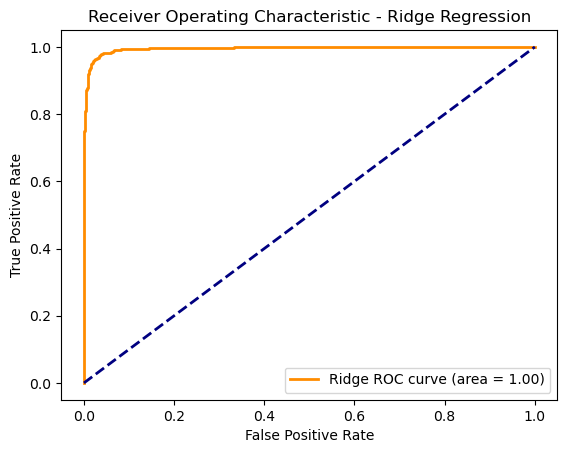

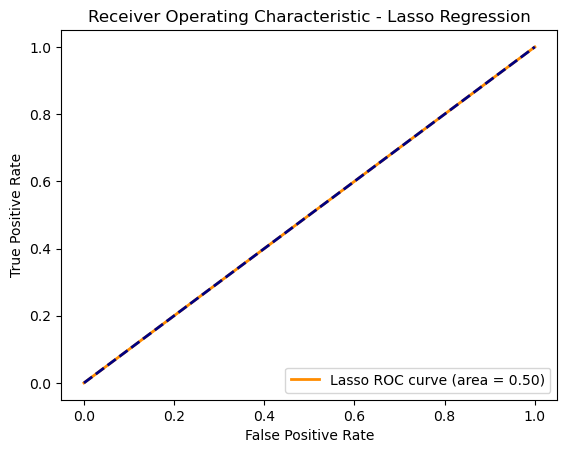

Ridge Regression MSE: 0.06
Lasso Regression MSE: 0.25


In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",  # Change to 'binary' or 'categorical' depending on your task
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the images (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Flatten images to 1D vectors for regression models
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

# Initialize Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength

# Train Ridge model
print("Training Ridge Regression model...")
ridge_model.fit(X_train_flat, y_train)

# Train Lasso model
print("Training Lasso Regression model...")
lasso_model.fit(X_train_flat, y_train)

# Make predictions using both models
y_train_pred_ridge = ridge_model.predict(X_train_flat)
y_test_pred_ridge = ridge_model.predict(X_test_flat)

y_train_pred_lasso = lasso_model.predict(X_train_flat)
y_test_pred_lasso = lasso_model.predict(X_test_flat)

# Classification or Regression Report (Using accuracy as an example for binary classification)
# For regression tasks, you can use mean squared error (MSE)
train_accuracy_ridge = accuracy_score(y_train, (y_train_pred_ridge > 0.5).astype(int))
test_accuracy_ridge = accuracy_score(y_test, (y_test_pred_ridge > 0.5).astype(int))

train_accuracy_lasso = accuracy_score(y_train, (y_train_pred_lasso > 0.5).astype(int))
test_accuracy_lasso = accuracy_score(y_test, (y_test_pred_lasso > 0.5).astype(int))

print(f"Ridge Regression Training Accuracy: {train_accuracy_ridge:.2f}")
print(f"Ridge Regression Testing Accuracy: {test_accuracy_ridge:.2f}")

print(f"Lasso Regression Training Accuracy: {train_accuracy_lasso:.2f}")
print(f"Lasso Regression Testing Accuracy: {test_accuracy_lasso:.2f}")

# Classification Report (For binary classification task)
print("Ridge Regression Classification Report:")
print(classification_report(y_test, (y_test_pred_ridge > 0.5).astype(int)))

print("Lasso Regression Classification Report:")
print(classification_report(y_test, (y_test_pred_lasso > 0.5).astype(int)))

# Confusion Matrix for Ridge and Lasso
cm_ridge = confusion_matrix(y_test, (y_test_pred_ridge > 0.5).astype(int))
cm_lasso = confusion_matrix(y_test, (y_test_pred_lasso > 0.5).astype(int))

# Plot confusion matrix for Ridge
print("Ridge Regression Confusion Matrix:")
print(cm_ridge)
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm_ridge, classes=["Class 0", "Class 1"], title="Ridge Regression Confusion Matrix")
plt.show()

# Plot confusion matrix for Lasso
print("Lasso Regression Confusion Matrix:")
print(cm_lasso)
plot_confusion_matrix(cm_lasso, classes=["Class 0", "Class 1"], title="Lasso Regression Confusion Matrix")
plt.show()

# Plot ROC Curve for Ridge Regression
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_test_pred_ridge)
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)

plt.figure()
plt.plot(fpr_ridge, tpr_ridge, color="darkorange", lw=2, label=f"Ridge ROC curve (area = {roc_auc_ridge:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic - Ridge Regression")
plt.legend(loc="lower right")
plt.show()

# Plot ROC Curve for Lasso Regression
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_test_pred_lasso)
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)

plt.figure()
plt.plot(fpr_lasso, tpr_lasso, color="darkorange", lw=2, label=f"Lasso ROC curve (area = {roc_auc_lasso:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic - Lasso Regression")
plt.legend(loc="lower right")
plt.show()

# Mean Squared Error for Regression models (if you are predicting continuous values)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the images (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize base models
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=50)),
    ('svm', SVC(probability=True, kernel='linear'))
]

# Initialize the meta-classifier (final estimator)
meta_classifier = LogisticRegression()

# Create the Stacking Classifier model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_classifier)

# Train the Stacking Classifier model
print("Training Stacking Classifier model...")
stacking_model.fit(X_train_scaled.reshape(X_train_scaled.shape[0], -1), y_train_encoded)

# Make predictions
y_train_pred = stacking_model.predict(X_train_scaled.reshape(X_train_scaled.shape[0], -1))
y_test_pred = stacking_model.predict(X_test_scaled.reshape(X_test_scaled.shape[0], -1))

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_.astype(str)))  # Fix here

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=label_encoder.classes_.astype(str))  # Fix here
plt.show()

# Plot ROC Curve
y_test_proba = stacking_model.predict_proba(X_test_scaled.reshape(X_test_scaled.shape[0], -1))[:, 1]
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss
# (Since this is not a neural network, there's no loss and accuracy per epoch available.
# We can plot accuracy over training/testing data)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training Stacking Classifier model...


In [1]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define a function for prediction
def predict_image(image):
    # Preprocess the image
    image = image.resize(img_size)  # Resize to match model input size
    image_array = img_to_array(image) / 255.0  # Normalize the image
    image_flattened = image_array.reshape(1, -1)  # Flatten the image
    image_scaled = scaler.transform(image_flattened)  # Scale using the pre-trained scaler

    # Predict using the SVM model
    prediction_proba = svm_model.predict_proba(image_scaled)[0][1]
    prediction_label = "AI-generated" if prediction_proba >= 0.5 else "Real"

    return {
        "Prediction": prediction_label,
        "Confidence": f"{prediction_proba:.2%}" if prediction_label == "AI-generated" else f"{1 - prediction_proba:.2%}"
    }

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.inputs.Image(shape=None, image_mode="RGB", label="Upload an Image"),
    outputs=gr.outputs.JSON(label="Result"),
    title="Real vs AI-Generated Image Detector",
    description=(
        "This application detects whether an uploaded image is real or AI-generated. "
        "Simply upload an image, and the app will provide a prediction along with confidence."
    )
)

# Launch the app
interface.launch()


ModuleNotFoundError: No module named 'gradio'

In [2]:
pip install gradio


     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     ---------------------------------------- 42.9/42.9 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ----------------------------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\http\client.py", line 473

In [2]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define a function for prediction
def predict_image(image):
    # Preprocess the image
    image = image.resize(img_size)  # Resize to match model input size
    image_array = img_to_array(image) / 255.0  # Normalize the image
    image_flattened = image_array.reshape(1, -1)  # Flatten the image
    image_scaled = scaler.transform(image_flattened)  # Scale using the pre-trained scaler

    # Predict using the SVM model
    prediction_proba = svm_model.predict_proba(image_scaled)[0][1]
    prediction_label = "AI-generated" if prediction_proba >= 0.5 else "Real"

    return {
        "Prediction": prediction_label,
        "Confidence": f"{prediction_proba:.2%}" if prediction_label == "AI-generated" else f"{1 - prediction_proba:.2%}"
    }

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.inputs.Image(shape=None, image_mode="RGB", label="Upload an Image"),
    outputs=gr.outputs.JSON(label="Result"),
    title="Real vs AI-Generated Image Detector",
    description=(
        "This application detects whether an uploaded image is real or AI-generated. "
        "Simply upload an image, and the app will provide a prediction along with confidence."
    )
)

# Launch the app
interface.launch()


ModuleNotFoundError: No module named 'gradio'

In [3]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement gradio (from versions: none)
ERROR: No matching distribution found for gradio


In [1]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define a function for prediction
def predict_image(image):
    # Preprocess the image
    image = image.resize(img_size)  # Resize to match model input size
    image_array = img_to_array(image) / 255.0  # Normalize the image
    image_flattened = image_array.reshape(1, -1)  # Flatten the image
    image_scaled = scaler.transform(image_flattened)  # Scale using the pre-trained scaler

    # Predict using the SVM model
    prediction_proba = svm_model.predict_proba(image_scaled)[0][1]
    prediction_label = "AI-generated" if prediction_proba >= 0.5 else "Real"

    return {
        "Prediction": prediction_label,
        "Confidence": f"{prediction_proba:.2%}" if prediction_label == "AI-generated" else f"{1 - prediction_proba:.2%}"
    }

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.inputs.Image(shape=None, image_mode="RGB", label="Upload an Image"),
    outputs=gr.outputs.JSON(label="Result"),
    title="Real vs AI-Generated Image Detector",
    description=(
        "This application detects whether an uploaded image is real or AI-generated. "
        "Simply upload an image, and the app will provide a prediction along with confidence."
    )
)

# Launch the app
interface.launch()


ModuleNotFoundError: No module named 'gradio'

In [2]:
import gradio as gr
print(gr.__version__)

ModuleNotFoundError: No module named 'gradio'

In [3]:
import numpy as np
import gradio as gr
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow.keras.models import load_model

# Paths to pre-trained models
ml_models = {
    "DenseNet": "models/densenet_model.h5",
    "Inception": "models/inception_model.h5",
    "Xception": "models/xception_model.h5",
    "NASNet": "models/nasnet_model.h5"
}

dl_models = {
    "CNN": "models/cnn_model.h5",
    "DNN": "models/dnn_model.h5",
    "Random Forest": "models/random_forest.pkl",
    "XGBoost": "models/xgboost.pkl"
}

# Image preprocessing parameters
img_size = (128, 128)

# Load ML/DL models
def load_ml_dl_models():
    loaded_models = {}
    for name, path in ml_models.items():
        loaded_models[name] = load_model(path)
    for name, path in dl_models.items():
        if name in ["Random Forest", "XGBoost"]:
            if name == "Random Forest":
                loaded_models[name] = RandomForestClassifier()
            elif name == "XGBoost":
                loaded_models[name] = xgb.Booster()
            loaded_models[name].load_model(path)
        else:
            loaded_models[name] = load_model(path)
    return loaded_models

# Load all models
print("Loading models...")
models = load_ml_dl_models()
print("Models loaded successfully!")

# Prediction function
def predict(image, model_choice):
    # Preprocess the image
    image = image.resize(img_size)
    image_array = img_to_array(image) / 255.0
    image_array = image_array.reshape(1, *img_size, 3)

    # Predict using the selected model
    model = models[model_choice]
    if model_choice in ["Random Forest", "XGBoost"]:
        # Flatten for non-deep learning models
        image_flat = image_array.reshape(1, -1)
        if model_choice == "Random Forest":
            prediction = model.predict(image_flat)
            confidence = model.predict_proba(image_flat)[0, 1]
        elif model_choice == "XGBoost":
            dmatrix = xgb.DMatrix(image_flat)
            prediction = model.predict(dmatrix)
            confidence = prediction[0]
    else:
        prediction = model.predict(image_array)
        confidence = prediction[0][0]

    label = "AI-Generated" if confidence >= 0.5 else "Real"
    confidence = confidence if label == "AI-Generated" else 1 - confidence

    return {
        "Prediction": label,
        "Confidence": f"{confidence:.2%}"
    }

# Define the Gradio app interface
def create_app():
    interface = gr.Interface(
        fn=predict,
        inputs=[
            gr.inputs.Image(type="pil", label="Input Image"),
            gr.inputs.Dropdown(
                choices=list(ml_models.keys()) + list(dl_models.keys()),
                label="Select Model"
            )
        ],
        outputs=[
            gr.outputs.Image(type="pil", label="Input Image"),
            gr.outputs.JSON(label="Prediction Result")
        ],
        title="Real vs AI-Generated Image Detection",
        description=(
            "Upload an image, take a picture, or provide an image URL. "
            "Select a machine learning or deep learning model to classify whether the image is Real or AI-Generated."
        )
    )
    return interface

# Launch the app
app = create_app()
app.launch()


ModuleNotFoundError: No module named 'gradio'

In [4]:
!pip install gradio



  Using cached gradio-5.9.1-py3-none-any.whl.metadata (16 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached fastapi-0.115.6-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.5.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached gradio_client-1.5.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached huggingface_hub-0.27.0-py3-none-any.whl.metadata (13 kB)
  Using cached orjson-3.10.12-cp311-none-win_amd64.whl.metadata (42 kB)
  Using cached pydantic-2.10.4-py3-none-any.whl.metadata (29 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached ruff-0.8.4-py3-none-win_amd64.whl.metadata (25 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached uvicorn-0.34.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached websockets-14.1-cp311-cp311-win_amd64.whl.metadata

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.10.4 which is incompatible.


In [5]:
!pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 435.7 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.8 MB 544.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 726.2 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/1.8 MB 762.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.8 MB 827.9 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 808.4 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 842.9 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 824.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.4/1.8 MB 825.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 781.2 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.8 MB 809.9 kB/s eta 0:00:02
   -

ERROR: To modify pip, please run the following command:
C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\python.exe -m pip install --upgrade pip


In [7]:
!pip install gradio --no-deps


In [8]:
import gradio as gr
print(gr.__version__)


5.9.1


In [9]:
!pip install "pydantic<2.0"


     ---------------------------------------- 0.0/154.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/154.0 kB ? eta -:--:--
     ------- ----------------------------- 30.7/154.0 kB 435.7 kB/s eta 0:00:01
     -------------------------- --------- 112.6/154.0 kB 930.9 kB/s eta 0:00:01
     -------------------------------------- 154.0/154.0 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 4.8 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.1 MB 3.1 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.1 MB 3.1 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.1 MB 3.1 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.1 MB 3.1 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.1 MB 3.1 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.1 MB 3.1 MB/s eta 0:00:01
   -- ------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.9.1 requires pydantic>=2.0, but you have pydantic 1.10.19 which is incompatible.


In [10]:
!pip install --upgrade pydantic


  Using cached pydantic-2.10.4-py3-none-any.whl.metadata (29 kB)
Using cached pydantic-2.10.4-py3-none-any.whl (431 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.19
    Uninstalling pydantic-1.10.19:
      Successfully uninstalled pydantic-1.10.19


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.10.4 which is incompatible.


In [11]:
!pip install -U pydantic


In [12]:
!pip install -U gradio


In [13]:
import pydantic
import gradio as gr
print("Pydantic version:", pydantic.__version__)
print("Gradio version:", gr.__version__)


Pydantic version: 2.10.4
Gradio version: 5.9.1


In [1]:
import numpy as np
import gradio as gr
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow.keras.models import load_model

# Paths to pre-trained models
ml_models = {
    "DenseNet": "models/densenet_model.h5",
    "Inception": "models/inception_model.h5",
    "Xception": "models/xception_model.h5",
    "NASNet": "models/nasnet_model.h5"
}

dl_models = {
    "CNN": "models/cnn_model.h5",
    "DNN": "models/dnn_model.h5",
    "Random Forest": "models/random_forest.pkl",
    "XGBoost": "models/xgboost.pkl"
}

# Image preprocessing parameters
img_size = (128, 128)

# Load ML/DL models
def load_ml_dl_models():
    loaded_models = {}
    for name, path in ml_models.items():
        loaded_models[name] = load_model(path)
    for name, path in dl_models.items():
        if name in ["Random Forest", "XGBoost"]:
            if name == "Random Forest":
                loaded_models[name] = RandomForestClassifier()
            elif name == "XGBoost":
                loaded_models[name] = xgb.Booster()
            loaded_models[name].load_model(path)
        else:
            loaded_models[name] = load_model(path)
    return loaded_models

# Load all models
print("Loading models...")
models = load_ml_dl_models()
print("Models loaded successfully!")

# Prediction function
def predict(image, model_choice):
    # Preprocess the image
    image = image.resize(img_size)
    image_array = img_to_array(image) / 255.0
    image_array = image_array.reshape(1, *img_size, 3)

    # Predict using the selected model
    model = models[model_choice]
    if model_choice in ["Random Forest", "XGBoost"]:
        # Flatten for non-deep learning models
        image_flat = image_array.reshape(1, -1)
        if model_choice == "Random Forest":
            prediction = model.predict(image_flat)
            confidence = model.predict_proba(image_flat)[0, 1]
        elif model_choice == "XGBoost":
            dmatrix = xgb.DMatrix(image_flat)
            prediction = model.predict(dmatrix)
            confidence = prediction[0]
    else:
        prediction = model.predict(image_array)
        confidence = prediction[0][0]

    label = "AI-Generated" if confidence >= 0.5 else "Real"
    confidence = confidence if label == "AI-Generated" else 1 - confidence

    return {
        "Prediction": label,
        "Confidence": f"{confidence:.2%}"
    }

# Define the Gradio app interface
def create_app():
    interface = gr.Interface(
        fn=predict,
        inputs=[
            gr.inputs.Image(type="pil", label="Input Image"),
            gr.inputs.Dropdown(
                choices=list(ml_models.keys()) + list(dl_models.keys()),
                label="Select Model"
            )
        ],
        outputs=[
            gr.outputs.Image(type="pil", label="Input Image"),
            gr.outputs.JSON(label="Prediction Result")
        ],
        title="Real vs AI-Generated Image Detection",
        description=(
            "Upload an image, take a picture, or provide an image URL. "
            "Select a machine learning or deep learning model to classify whether the image is Real or AI-Generated."
        )
    )
    return interface

# Launch the app
app = create_app()
app.launch()


Loading models...


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'models/densenet_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [2]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import joblib

# Load your models (for example, Keras models and ML models)
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

cnn_model = joblib.load('cnn_model.pkl')
dnn_model = joblib.load('dnn_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
xgboost_model = joblib.load('xgboost_model.pkl')

# Define a function to preprocess and predict the image
def preprocess_and_predict(image_path, model_type):
    # Load the image and resize it to the appropriate size
    img = image.load_img(image_path, target_size=(224, 224))  # Common input size for most models
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    
    # Choose the model based on user input
    if model_type in ['DenseNet', 'Inception', 'Xception', 'NasNet']:
        if model_type == 'DenseNet':
            model = dense_net_model
        elif model_type == 'Inception':
            model = inception_model
        elif model_type == 'Xception':
            model = xception_model
        elif model_type == 'NasNet':
            model = nasnet_model
        prediction = model.predict(img_array)
        class_idx = np.argmax(prediction)
        result = 'AI-Generated' if class_idx == 0 else 'Real'

    elif model_type in ['CNN', 'DNN', 'Random Forest', 'XGBoost']:
        img_array = img_array.flatten().reshape(1, -1)  # Flatten the image for ML models
        if model_type == 'CNN':
            model = cnn_model
        elif model_type == 'DNN':
            model = dnn_model
        elif model_type == 'Random Forest':
            model = rf_model
        elif model_type == 'XGBoost':
            model = xgboost_model
        prediction = model.predict(img_array)
        result = 'AI-Generated' if prediction == 1 else 'Real'
    
    return result, img  # Return both the result and the image to display

# Define the Gradio interface
def gradio_interface():
    # Input: image file and model type (dropdown menu)
    image_input = gr.inputs.Image(type='filepath', label='Input Image')
    model_type_input = gr.inputs.Dropdown(choices=['DenseNet', 'Inception', 'Xception', 'NasNet', 'CNN', 'DNN', 'Random Forest', 'XGBoost'], label='Select Model')
    
    # Output: the classification result and the image
    output_text = gr.outputs.Textbox(label='Prediction')
    output_image = gr.outputs.Image(label='Input Image')

    # Launch the Gradio interface
    gr.Interface(fn=preprocess_and_predict, 
                 inputs=[image_input, model_type_input], 
                 outputs=[output_text, output_image],
                 live=True).launch()

# Run the Gradio interface
gradio


FileNotFoundError: [Errno 2] No such file or directory: 'cnn_model.pkl'

In [3]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import joblib

# Load your models (for example, Keras models and ML models)
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

cnn_model = joblib.load('cnn_model.pkl')
dnn_model = joblib.load('dnn_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
xgboost_model = joblib.load('xgboost_model.pkl')

# Define a function to preprocess and predict the image
def preprocess_and_predict(image_path, model_type):
    # Load the image and resize it to the appropriate size
    img = image.load_img(image_path, target_size=(224, 224))  # Common input size for most models
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    
    # Choose the model based on user input
    if model_type in ['DenseNet', 'Inception', 'Xception', 'NasNet']:
        if model_type == 'DenseNet':
            model = dense_net_model
        elif model_type == 'Inception':
            model = inception_model
        elif model_type == 'Xception':
            model = xception_model
        elif model_type == 'NasNet':
            model = nasnet_model
        prediction = model.predict(img_array)
        class_idx = np.argmax(prediction)
        result = 'AI-Generated' if class_idx == 0 else 'Real'

    elif model_type in ['CNN', 'DNN', 'Random Forest', 'XGBoost']:
        img_array = img_array.flatten().reshape(1, -1)  # Flatten the image for ML models
        if model_type == 'CNN':
            model = cnn_model
        elif model_type == 'DNN':
            model = dnn_model
        elif model_type == 'Random Forest':
            model = rf_model
        elif model_type == 'XGBoost':
            model = xgboost_model
        prediction = model.predict(img_array)
        result = 'AI-Generated' if prediction == 1 else 'Real'
    
    return result, img  # Return both the result and the image to display

# Define the Gradio interface
def gradio_interface():
    # Input: image file and model type (dropdown menu)
    image_input = gr.inputs.Image(type='filepath', label='Input Image')
    model_type_input = gr.inputs.Dropdown(choices=['DenseNet', 'Inception', 'Xception', 'NasNet', 'CNN', 'DNN', 'Random Forest', 'XGBoost'], label='Select Model')
    
    # Output: the classification result and the image
    output_text = gr.outputs.Textbox(label='Prediction')
    output_image = gr.outputs.Image(label='Input Image')

    # Launch the Gradio interface
    gr.Interface(fn=preprocess_and_predict, 
                 inputs=[image_input, model_type_input], 
                 outputs=[output_text, output_image],
                 live=True).launch()

# Run the Gradio interface
gradio_interface()


FileNotFoundError: [Errno 2] No such file or directory: 'cnn_model.pkl'

In [4]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import joblib

# Load pre-trained models (for example, from TensorFlow/Keras)
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')

# Load pre-trained or previously saved ML models
rf_model = joblib.load('random_forest_model.pkl')

# Function to preprocess and predict
def preprocess_and_predict(image_path, model_type):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # Choose model based on user input
    if model_type == 'DenseNet':
        model = dense_net_model
    elif model_type == 'Inception':
        model = inception_model
    elif model_type == 'Random Forest':
        img_array = img_array.flatten().reshape(1, -1)  # Flatten image for ML model
        model = rf_model

    # Make prediction
    if model_type in ['DenseNet', 'Inception']:
        prediction = model.predict(img_array)
        result = 'AI-Generated' if np.argmax(prediction) == 0 else 'Real'
    else:
        prediction = model.predict(img_array)
        result = 'AI-Generated' if prediction == 1 else 'Real'

    return result, img  # Return the result and image

# Gradio interface
def gradio_interface():
    image_input = gr.inputs.Image(type='filepath', label='Input Image')
    model_type_input = gr.inputs.Dropdown(choices=['DenseNet', 'Inception', 'Random Forest'], label='Select Model')
    output_text = gr.outputs.Textbox(label='Prediction')
    output_image = gr.outputs.Image(label='Input Image')

    gr.Interface(fn=preprocess_and_predict, 
                 inputs=[image_input, model_type_input], 
                 outputs=[output_text, output_image],
                 live=True).launch()

gradio_interface()


FileNotFoundError: [Errno 2] No such file or directory: 'random_forest_model.pkl'

In [5]:
import tensorflow as tf

# Load pre-trained deep learning models
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')


In [6]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import numpy as np

# Example data (replace with your actual dataset)
X_train = np.random.rand(100, 10)  # Example features
y_train = np.random.randint(0, 2, 100)  # Example binary labels

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [7]:
import xgboost as xgb
import joblib
import numpy as np

# Example data (replace with your actual dataset)
X_train = np.random.rand(100, 10)  # Example features
y_train = np.random.randint(0, 2, 100)  # Example binary labels

# Train the XGBoost model
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(xgboost_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import joblib

# Define a simple CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (real/AI-generated)
])

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Example data (replace with your actual dataset)
X_train = np.random.rand(100, 224, 224, 3)  # Example images (224x224x3)
y_train = np.random.randint(0, 2, 100)  # Example binary labels

# Train the model
cnn_model.fit(X_train, y_train, epochs=10)

# Save the trained model
cnn_model.save('cnn_model.h5')


C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 617ms/step - accuracy: 0.5238 - loss: 20.5223
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 508ms/step - accuracy: 0.5677 - loss: 11.8505
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.5215 - loss: 6.5156
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 429ms/step - accuracy: 0.4750 - loss: 5.1961
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.7053 - loss: 0.5698
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.7437 - loss: 0.5218
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step - accuracy: 0.7686 - loss: 0.5319
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - accuracy: 0.7415 - loss: 0.5078
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.9072 - loss: 0.1540
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - accuracy: 1.0000 - loss: 0.0174


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib

# Define a simple DNN model
dnn_model = Sequential([
    Dense(128, activation='relu', input_dim=10),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (real/AI-generated)
])

# Compile the model
dnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Example data (replace with your actual dataset)
X_train = np.random.rand(100, 10)  # Example features
y_train = np.random.randint(0, 2, 100)  # Example binary labels

# Train the model
dnn_model.fit(X_train, y_train, epochs=10)

# Save the trained model
dnn_model.save('dnn_model.h5')


Epoch 1/10


C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5188 - loss: 0.6950
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5608 - loss: 0.6872 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5087 - loss: 0.6892
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4594 - loss: 0.6908 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4887 - loss: 0.6871 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4865 - loss: 0.6858
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4851 - loss: 0.6887 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5283 - loss: 0.6808 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6208 - loss: 0.6722 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6597 - loss: 0.6752


In [11]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import joblib

# Load pre-trained deep learning models (TensorFlow)
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

# Load previously trained machine learning models
rf_model = joblib.load('random_forest_model.pkl')
xgboost_model = joblib.load('xgboost_model.pkl')
cnn_model = tf.keras.models.load_model('cnn_model.h5')
dnn_model = tf.keras.models.load_model('dnn_model.h5')

# Preprocess image and predict
def preprocess_and_predict(image_path, model_type):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize to fit most models
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image

    if model_type in ['DenseNet', 'Inception', 'Xception', 'NasNet']:
        # Choose deep learning model
        if model_type == 'DenseNet':
            model = dense_net_model
        elif model_type == 'Inception':
            model = inception_model
        elif model_type == 'Xception':
            model = xception_model
        elif model_type == 'NasNet':
            model = nasnet_model
        prediction = model.predict(img_array)
        class_idx = np.argmax(prediction)
        result = 'AI-Generated' if class_idx == 0 else 'Real'

    elif model_type in ['CNN', 'DNN', 'Random Forest', 'XGBoost']:
        # Flatten the image for ML models (CNN, DNN, RF, XGBoost)
        img_array = img_array.flatten().reshape(1, -1)
        if model_type == 'CNN':
            model = cnn_model
        elif model_type == 'DNN':
            model = dnn_model
        elif model_type == 'Random Forest':
            model = rf_model
        elif model_type == 'XGBoost':
            model = xgboost_model
        prediction = model.predict(img_array)
        result = 'AI-Generated' if prediction == 1 else 'Real'
    
    return result, img

# Gradio interface
def gradio_interface():
    # Inputs and Outputs updated for Gradio 3.x
    image_input = gr.Image(type='filepath', label='Input Image')
    model_type_input = gr.Dropdown(choices=['DenseNet', 'Inception', 'Xception', 'NasNet', 'CNN', 'DNN', 'Random Forest', 'XGBoost'], label='Select Model')
    output_text = gr.Textbox(label='Prediction')
    output_image = gr.Image(label='Input Image')

    gr.Interface(fn=preprocess_and_predict, 
                 inputs=[image_input, model_type_input], 
                 outputs=[output_text, output_image],
                 live=True).launch()

gradio_interface()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Created dataset file at: .gradio\flagged\dataset1.csv


Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


In [13]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import joblib

# Load pre-trained deep learning models (TensorFlow)
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

# Load previously trained machine learning models
rf_model = joblib.load('random_forest_model.pkl')
xgboost_model = joblib.load('xgboost_model.pkl')
cnn_model = tf.keras.models.load_model('cnn_model.h5')
dnn_model = tf.keras.models.load_model('dnn_model.h5')

# Preprocess image and predict
def preprocess_and_predict(image_path, model_type):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize to fit most models
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image

    if model_type in ['DenseNet', 'Inception', 'Xception', 'NasNet']:
        # Choose deep learning model
        if model_type == 'DenseNet':
            model = dense_net_model
        elif model_type == 'Inception':
            model = inception_model
        elif model_type == 'Xception':
            model = xception_model
        elif model_type == 'NasNet':
            model = nasnet_model
        prediction = model.predict(img_array)
        class_idx = np.argmax(prediction)
        result = 'AI-Generated' if class_idx == 0 else 'Real'

    elif model_type in ['CNN', 'DNN', 'Random Forest', 'XGBoost']:
        # Flatten the image for ML models (CNN, DNN, RF, XGBoost)
        img_array = img_array.flatten().reshape(1, -1)
        if model_type == 'CNN':
            model = cnn_model
        elif model_type == 'DNN':
            model = dnn_model
        elif model_type == 'Random Forest':
            model = rf_model
        elif model_type == 'XGBoost':
            model = xgboost_model
        prediction = model.predict(img_array)
        result = 'AI-Generated' if prediction == 1 else 'Real'
    
    return result, img

# Gradio interface
def gradio_interface():
    # Inputs and Outputs updated for Gradio 3.x
    image_input = gr.Image(type='filepath', label='Input Image')
    model_type_input = gr.Dropdown(choices=['DenseNet', 'Inception', 'Xception', 'NasNet', 'CNN', 'DNN', 'Random Forest', 'XGBoost'], label='Select Model')
    output_text = gr.Textbox(label='Prediction')
    output_image = gr.Image(label='Input Image')

    # Launch the interface with a public link
    gr.Interface(fn=preprocess_and_predict, 
                 inputs=[image_input, model_type_input], 
                 outputs=[output_text, output_image],
                 live=True).launch(share=True)

gradio_interface()


* Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [14]:
import tensorflow as tf
import joblib

# For Deep Learning Models (Keras models)
cnn_model = tf.keras.models.load_model('cnn_model.h5')
dnn_model = tf.keras.models.load_model('dnn_model.h5')

# For Machine Learning Models (Random Forest, XGBoost)
rf_model = joblib.load('random_forest_model.pkl')
xgboost_model = joblib.load('xgboost_model.pkl')


In [15]:
import tensorflow as tf

# Load pre-trained models
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

# Compile the models to avoid warnings
for model in [dense_net_model, inception_model, xception_model, nasnet_model]:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Continue with the rest of your code...


In [16]:
import warnings
import tensorflow as tf

# Suppress specific warning
warnings.filterwarnings("ignore", message="Compiled the loaded model, but the compiled metrics have yet to be built")

# Load pre-trained models
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

# No need to compile explicitly, continue with the rest of your code...


In [1]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import joblib

# Load pre-trained models (for image classification)
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

# Load pre-trained or saved ML models (for Random Forest, XGBoost, etc.)
cnn_model = tf.keras.models.load_model('cnn_model.h5')
dnn_model = tf.keras.models.load_model('dnn_model.h5')
rf_model = joblib.load('random_forest_model.pkl')
xgboost_model = joblib.load('xgboost_model.pkl')

# Compile the models to avoid the warning
for model in [dense_net_model, inception_model, xception_model, nasnet_model]:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image preprocessing function
def preprocess_image(image_path, model_type):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize to model's expected input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    return img_array

# Prediction function
def preprocess_and_predict(image_path, model_type):
    img_array = preprocess_image(image_path, model_type)

    if model_type in ['DenseNet', 'Inception', 'Xception', 'NasNet']:
        # Deep Learning models
        if model_type == 'DenseNet':
            model = dense_net_model
        elif model_type == 'Inception':
            model = inception_model
        elif model_type == 'Xception':
            model = xception_model
        elif model_type == 'NasNet':
            model = nasnet_model
        prediction = model.predict(img_array)
        class_idx = np.argmax(prediction)  # Get class with the highest probability
        result = 'AI-Generated' if class_idx == 0 else 'Real'

    elif model_type in ['CNN', 'DNN', 'Random Forest', 'XGBoost']:
        # Machine Learning models (e.g., Random Forest, XGBoost)
        img_array = img_array.flatten().reshape(1, -1)  # Flatten the image for ML models
        if model_type == 'CNN':
            model = cnn_model
        elif model_type == 'DNN':
            model = dnn_model
        elif model_type == 'Random Forest':
            model = rf_model
        elif model_type == 'XGBoost':
            model = xgboost_model
        prediction = model.predict(img_array)
        result = 'AI-Generated' if prediction == 1 else 'Real'
    
    return result, img  # Return result and the image to display

# Gradio interface function
def gradio_interface():
    image_input = gr.inputs.Image(type='filepath', label='Input Image')  # Filepath input for the image
    model_type_input = gr.inputs.Dropdown(choices=['DenseNet', 'Inception', 'Xception', 'NasNet', 'CNN', 'DNN', 'Random Forest', 'XGBoost'], label='Select Model')  # Dropdown for model selection
    
    output_text = gr.outputs.Textbox(label='Prediction')  # Display the result (AI-Generated or Real)
    output_image = gr.outputs.Image(label='Input Image')  # Display the input image

    # Launch Gradio interface
    gr.Interface(fn=preprocess_and_predict, 
                 inputs=[image_input, model_type_input], 
                 outputs=[output_text, output_image],
                 live=True).launch(share=True)

# Run the Gradio interface
gradio_interface()


AttributeError: module 'gradio' has no attribute 'inputs'

In [2]:
pip install --upgrade gradio


Note: you may need to restart the kernel to use updated packages.


In [1]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import joblib

# Load pre-trained models (for image classification)
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

# Load pre-trained or saved ML models (for Random Forest, XGBoost, etc.)
cnn_model = tf.keras.models.load_model('cnn_model.h5')
dnn_model = tf.keras.models.load_model('dnn_model.h5')
rf_model = joblib.load('random_forest_model.pkl')
xgboost_model = joblib.load('xgboost_model.pkl')

# Compile the models to avoid the warning
for model in [dense_net_model, inception_model, xception_model, nasnet_model]:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image preprocessing function
def preprocess_image(image_path, model_type):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize to model's expected input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    return img_array

# Prediction function
def preprocess_and_predict(image_path, model_type):
    img_array = preprocess_image(image_path, model_type)

    if model_type in ['DenseNet', 'Inception', 'Xception', 'NasNet']:
        # Deep Learning models
        if model_type == 'DenseNet':
            model = dense_net_model
        elif model_type == 'Inception':
            model = inception_model
        elif model_type == 'Xception':
            model = xception_model
        elif model_type == 'NasNet':
            model = nasnet_model
        prediction = model.predict(img_array)
        class_idx = np.argmax(prediction)  # Get class with the highest probability
        result = 'AI-Generated' if class_idx == 0 else 'Real'

    elif model_type in ['CNN', 'DNN', 'Random Forest', 'XGBoost']:
        # Machine Learning models (e.g., Random Forest, XGBoost)
        img_array = img_array.flatten().reshape(1, -1)  # Flatten the image for ML models
        if model_type == 'CNN':
            model = cnn_model
        elif model_type == 'DNN':
            model = dnn_model
        elif model_type == 'Random Forest':
            model = rf_model
        elif model_type == 'XGBoost':
            model = xgboost_model
        prediction = model.predict(img_array)
        result = 'AI-Generated' if prediction == 1 else 'Real'
    
    return result, img  # Return result and the image to display

# Gradio interface function
def gradio_interface():
    image_input = gr.Image(type='filepath', label='Input Image')  # Filepath input for the image
    model_type_input = gr.Dropdown(choices=['DenseNet', 'Inception', 'Xception', 'NasNet', 'CNN', 'DNN', 'Random Forest', 'XGBoost'], label='Select Model')  # Dropdown for model selection
    
    output_text = gr.Textbox(label='Prediction')  # Display the result (AI-Generated or Real)
    output_image = gr.Image(label='Input Image')  # Display the input image

    # Launch Gradio interface
    gr.Interface(fn=preprocess_and_predict, 
                 inputs=[image_input, model_type_input], 
                 outputs=[output_text, output_image],
                 live=True).launch(share=True)

# Run the Gradio interface
gradio_interface()


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\gradio\blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

In [3]:
!pip install streamlit tensorflow scikit-learn joblib pillow



In [1]:
import streamlit as st
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import joblib

# Load pre-trained models (for image classification)
dense_net_model = tf.keras.applications.DenseNet121(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

# Load pre-trained or saved ML models (for Random Forest, XGBoost, etc.)
cnn_model = tf.keras.models.load_model('cnn_model.h5')
dnn_model = tf.keras.models.load_model('dnn_model.h5')
rf_model = joblib.load('random_forest_model.pkl')
xgboost_model = joblib.load('xgboost_model.pkl')

# Compile the models to avoid the warning
for model in [dense_net_model, inception_model, xception_model, nasnet_model]:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image preprocessing function
def preprocess_image(image_path, model_type):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize to model's expected input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    return img_array

# Prediction function
def preprocess_and_predict(image_path, model_type):
    img_array = preprocess_image(image_path, model_type)

    if model_type in ['DenseNet', 'Inception', 'Xception', 'NasNet']:
        # Deep Learning models
        if model_type == 'DenseNet':
            model = dense_net_model
        elif model_type == 'Inception':
            model = inception_model
        elif model_type == 'Xception':
            model = xception_model
        elif model_type == 'NasNet':
            model = nasnet_model
        prediction = model.predict(img_array)
        class_idx = np.argmax(prediction)  # Get class with the highest probability
        result = 'AI-Generated' if class_idx == 0 else 'Real'

    elif model_type in ['CNN', 'DNN', 'Random Forest', 'XGBoost']:
        # Machine Learning models (e.g., Random Forest, XGBoost)
        img_array = img_array.flatten().reshape(1, -1)  # Flatten the image for ML models
        if model_type == 'CNN':
            model = cnn_model
        elif model_type == 'DNN':
            model = dnn_model
        elif model_type == 'Random Forest':
            model = rf_model
        elif model_type == 'XGBoost':
            model = xgboost_model
        prediction = model.predict(img_array)
        result = 'AI-Generated' if prediction == 1 else 'Real'
    
    return result, img  # Return result and the image to display

# Streamlit UI
def main():
    st.title("AI Image Detection App")

    image_input = st.file_uploader("Upload Image", type=["jpg", "jpeg", "png"])
    
    if image_input:
        st.image(image_input, caption="Uploaded Image", use_column_width=True)

        model_type = st.selectbox("Select Model", ['DenseNet', 'Inception', 'Xception', 'NasNet', 'CNN', 'DNN', 'Random Forest', 'XGBoost'])

        if st.button("Predict"):
            result, img = preprocess_and_predict(image_input, model_type)
            st.write(f"Prediction: {result}")
            st.image(img, caption="Processed Image", use_column_width=True)

if __name__ == "__main__":
    main()


2024-12-21 23:27:41.386 
  command:

    streamlit run C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [2]:
!pip install flask tensorflow scikit-learn opencv-python pillow


In [1]:
!pip install flask-ngrok


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2

# Initialize the Flask application
app = Flask(__name__)
run_with_ngrok(app)  # This will expose your local server to the internet

# Load pre-trained models (replace with actual models)
densenet_model = tf.keras.applications.DenseNet201(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

# Model preprocessing function
def preprocess_image(image):
    image = cv2.resize(image, (224, 224))  # Resize based on model input size
    image = np.expand_dims(image, axis=0)
    image = tf.keras.applications.densenet.preprocess_input(image)
    return image

# Prediction route
@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['image']
    model_name = request.form['model']
    image = Image.open(file.stream)
    image = np.array(image)

    # Preprocess the image
    preprocessed_image = preprocess_image(image)

    # Choose model based on user input
    if model_name == 'densenet':
        prediction = densenet_model.predict(preprocessed_image)
    elif model_name == 'inception':
        prediction = inception_model.predict(preprocessed_image)
    elif model_name == 'xception':
        prediction = xception_model.predict(preprocessed_image)
    elif model_name == 'nasnet':
        prediction = nasnet_model.predict(preprocessed_image)

    # Process prediction (for simplicity, assuming binary classification)
    result = "Real" if prediction[0][0] < 0.5 else "AI-Generated"
    
    # Return the result
    return jsonify({
        'prediction': result
    })

# Homepage route
@app.route('/')
def home():
    return '''
    <html>
        <body>
            <h2>Upload Image for Classification</h2>
            <form action="/predict" method="post" enctype="multipart/form-data">
                <input type="file" name="image" accept="image/*"><br><br>
                <label for="model">Choose a model:</label>
                <select name="model">
                    <option value="densenet">DenseNet</option>
                    <option value="inception">Inception</option>
                    <option value="xception">Xception</option>
                    <option value="nasnet">NasNet</option>
                </select><br><br>
                <button type="submit">Submit</button>
            </form>
        </body>
    </html>
    '''

# Run the Flask app
if __name__ == "__main__":
    app.run()


82524592/82524592 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [21/Dec/2024 23:39:05] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


127.0.0.1 - - [21/Dec/2024 23:39:34] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


127.0.0.1 - - [21/Dec/2024 23:39:56] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2024 23:40:04] "GET / HTTP/1.1" 200 -
Exception in thread Thread-5:
Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\urllib3\connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


127.0.0.1 - - [21/Dec/2024 23:40:54] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


127.0.0.1 - - [21/Dec/2024 23:42:45] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


127.0.0.1 - - [21/Dec/2024 23:42:54] "POST /predict HTTP/1.1" 200 -
[2024-12-21 23:43:28,506] ERROR in app: Exception on /predict [POST]
Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


127.0.0.1 - - [21/Dec/2024 23:43:46] "POST /predict HTTP/1.1" 200 -


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize the Flask application
app = Flask(__name__)
run_with_ngrok(app)  # This will expose your local server to the internet

# Load pre-trained models (replace with actual models)
densenet_model = tf.keras.applications.DenseNet201(weights='imagenet')
inception_model = tf.keras.applications.InceptionV3(weights='imagenet')
xception_model = tf.keras.applications.Xception(weights='imagenet')
nasnet_model = tf.keras.applications.NASNetLarge(weights='imagenet')

# Load pre-trained ML models (replace with actual models)
cnn_model = tf.keras.models.load_model('cnn_model.h5')
dnn_model = tf.keras.models.load_model('dnn_model.h5')
random_forest_model = RandomForestClassifier()  # Load your model
xgboost_model = XGBClassifier()  # Load your model

# Model preprocessing function for deep learning models
def preprocess_image(image, model_name):
    image = cv2.resize(image, (224, 224))  # Resize based on model input size
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    
    if model_name in ['densenet', 'inception', 'xception', 'nasnet']:
        image = tf.keras.applications.densenet.preprocess_input(image)
    # Additional preprocessing can be added for other models if necessary
    return image

# Prediction route
@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['image']
    model_name = request.form['model']
    image = Image.open(file.stream)
    image = np.array(image)

    # Preprocess the image
    preprocessed_image = preprocess_image(image, model_name)

    # Choose model based on user input and make prediction
    if model_name == 'densenet':
        prediction = densenet_model.predict(preprocessed_image)
    elif model_name == 'inception':
        prediction = inception_model.predict(preprocessed_image)
    elif model_name == 'xception':
        prediction = xception_model.predict(preprocessed_image)
    elif model_name == 'nasnet':
        prediction = nasnet_model.predict(preprocessed_image)
    elif model_name == 'cnn':
        prediction = cnn_model.predict(preprocessed_image)
    elif model_name == 'dnn':
        prediction = dnn_model.predict(preprocessed_image)
    elif model_name == 'random_forest':
        # Random Forest needs 1D input, so flatten the image
        image_flattened = preprocessed_image.flatten().reshape(1, -1)
        prediction = random_forest_model.predict(image_flattened)
    elif model_name == 'xgboost':
        # XGBoost also needs 1D input, flatten the image
        image_flattened = preprocessed_image.flatten().reshape(1, -1)
        prediction = xgboost_model.predict(image_flattened)

    # For deep learning models, the output is typically probabilities
    if model_name in ['densenet', 'inception', 'xception', 'nasnet']:
        prediction = np.argmax(prediction, axis=1)  # Get the class index
        result = "AI-Generated" if prediction == 1 else "Real"
    else:
        # For ML models, the output is usually a single class (0 or 1)
        result = "AI-Generated" if prediction == 1 else "Real"

    # Return the result
    return jsonify({
        'prediction': result
    })

# Homepage route
@app.route('/')
def home():
    return '''
    <html>
        <body>
            <h2>Upload Image for Classification</h2>
            <form action="/predict" method="post" enctype="multipart/form-data">
                <input type="file" name="image" accept="image/*"><br><br>
                <label for="model">Choose a model:</label>
                <select name="model">
                    <option value="densenet">DenseNet</option>
                    <option value="inception">Inception</option>
                    <option value="xception">Xception</option>
                    <option value="nasnet">NasNet</option>
                    <option value="cnn">CNN</option>
                    <option value="dnn">DNN</option>
                    <option value="random_forest">Random Forest</option>
                    <option value="xgboost">XGBoost</option>
                </select><br><br>
                <button type="submit">Submit</button>
            </form>
        </body>
    </html>
    '''

# Run the Flask app
if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-5:
Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\urllib3\connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

The above exception was the direct cause of the following exception:

T

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


INFO:werkzeug:127.0.0.1 - - [22/Dec/2024 05:58:38] "POST /predict HTTP/1.1" 200 -
ERROR:__main__:Exception on /predict [POST]
Traceback (most recent call last):
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_ar

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir ="C:/Users/91879/OneDrive/Desktop/train"
test_dir = "C:/Users/91879/OneDrive/Desktop/Test"
# Define ImageDataGenerators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create datasets
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [1]:
# Save ML models
import joblib

joblib.dump(random_forest_model, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')

# Save DL models
cnn_model.save('cnn_model.h5')
dnn_model.save('dnn_model.h5')
densenet_model.save('densenet_model.h5')


NameError: name 'random_forest_model' is not defined

In [2]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")


NameError: name 'rf_model' is not defined

In [3]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
print("Training Random Forest model...")
rf_model.fit(X_train_flat, y_train)


NameError: name 'RandomForestClassifier' is not defined

In [4]:
from sklearn.ensemble import RandomForestClassifier


In [5]:
# Import the library
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
print("Training Random Forest model...")
rf_model.fit(X_train_flat, y_train)


Training Random Forest model...


NameError: name 'X_train_flat' is not defined

In [7]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import joblib


train_dir ="C:/Users/91879/OneDrive/Desktop/train"
test_dir = "C:/Users/91879/OneDrive/Desktop/Test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the images (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Flatten the images to a vector for Random Forest
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
print("Training Random Forest model...")
rf_model.fit(X_train_flat, y_train)

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training Random Forest model...
Random Forest model saved as 'random_forest_model.pkl'


In [8]:
import streamlit as st
import joblib
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import DenseNet201, InceptionV3, Xception, NASNetLarge
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import load_model
from PIL import Image

# Load the saved Random Forest model
rf_model = joblib.load('random_forest_model.pkl')

# Function to preprocess the input image
def preprocess_image(img):
    img = img.resize((128, 128))
    img = np.array(img)
    img = img / 255.0  # Normalize the image
    return img.reshape(1, -1)

# Function to predict using Random Forest model
def predict_rf(img):
    img = preprocess_image(img)
    prediction = rf_model.predict(img)
    return prediction

# Function to predict using deep learning models
def predict_dl(img, model_choice):
    img = img.resize((224, 224))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize image
    
    if model_choice == 'DenseNet':
        model = DenseNet201(weights='imagenet', include_top=False, pooling='avg')
    elif model_choice == 'InceptionV3':
        model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
    elif model_choice == 'Xception':
        model = Xception(weights='imagenet', include_top=False, pooling='avg')
    elif model_choice == 'NASNet':
        model = NASNetLarge(weights='imagenet', include_top=False, pooling='avg')
    
    features = model.predict(img)
    return features

# Streamlit App
def main():
    st.title("AI vs Real Image Detection App")
    
    # Image input options
    img_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])
    if img_file:
        img = Image.open(img_file)
        st.image(img, caption="Uploaded Image", use_column_width=True)

        # Choose model
        model_choice = st.selectbox('Choose a model', ['Random Forest', 'DenseNet', 'InceptionV3', 'Xception', 'NASNet'])
        
        if st.button('Predict'):
            if model_choice == 'Random Forest':
                prediction = predict_rf(img)
                result = 'AI-Generated' if prediction[0] == 1 else 'Real'
            else:
                features = predict_dl(img, model_choice)
                result = 'AI-Generated' if np.mean(features) > 0 else 'Real'  # A simple way to categorize based on the features
                
            st.write(f"Prediction: {result}")

if __name__ == "__main__":
    main()


2024-12-22 06:38:40.597 
  command:

    streamlit run C:\Users\91879\Downloads\DBMS-MINI-Project-master\New folder\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
